# Stock Market Price Predictor

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

##### Downloading NFLX Stock Data using Yahoo Finance

In [5]:
from pandas_datareader import data as pdr
start = "2010-01-01"
end = "2022-12-31"
import yfinance as yf
yf.pdr_override() 
# download dataframe
df = pdr.get_data_yahoo("NFLX", start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100
2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100
2022-12-28,281.920013,285.190002,273.410004,276.880005,276.880005,5964400
2022-12-29,283.179993,295.500000,281.010010,291.119995,291.119995,9588500
2022-12-30,285.529999,295.010010,283.220001,294.880005,294.880005,7566900


In [7]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700
2010-01-12,7.528571,7.582857,7.451429,7.481429,7.481429,6330100
2010-01-13,7.612857,7.754286,7.558571,7.708571,7.708571,14422100
2010-01-14,7.518571,7.575714,7.270000,7.284286,7.284286,17685500


Resetting Index...

In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [9]:
df = df.drop(['Adj Close', 'Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.931429,7.961429,7.565714,7.640000,17239600
1,7.652857,7.657143,7.258571,7.358571,23753100
2,7.361429,7.672857,7.197143,7.617143,23290400
3,7.731429,7.757143,7.462857,7.485714,9955400
4,7.498571,7.742857,7.465714,7.614286,8180900


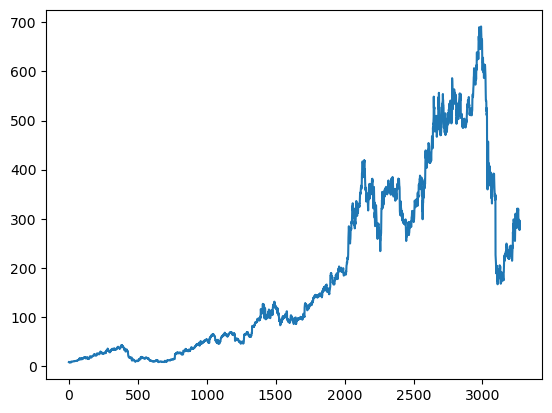

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,7.931429,7.961429,7.565714,7.640000,17239600
1,7.652857,7.657143,7.258571,7.358571,23753100
2,7.361429,7.672857,7.197143,7.617143,23290400
3,7.731429,7.757143,7.462857,7.485714,9955400
4,7.498571,7.742857,7.465714,7.614286,8180900
...,...,...,...,...,...
3267,296.179993,298.459991,291.910004,294.959991,4251100
3268,293.190002,293.570007,282.130005,284.170013,5778100
3269,281.920013,285.190002,273.410004,276.880005,5964400
3270,283.179993,295.500000,281.010010,291.119995,9588500


Calculating Moving Average for 100 days...

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    260.837101
3268    261.379701
3269    261.880701
3270    262.457001
3271    263.106401
Name: Close, Length: 3272, dtype: float64

[]

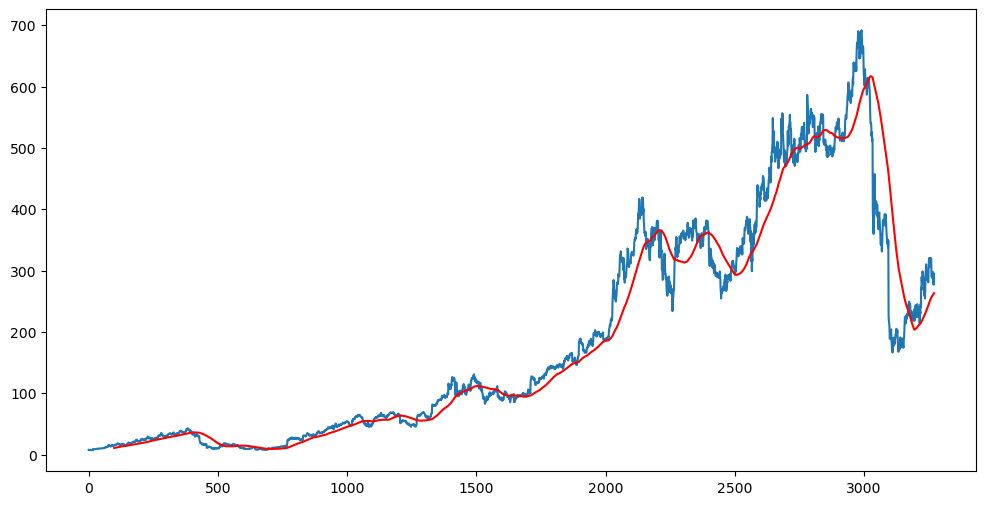

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot()

Calculating and plotting moving average for 200 days...

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3267    250.08970
3268    249.80895
3269    249.53830
3270    249.27515
3271    248.96190
Name: Close, Length: 3272, dtype: float64

[]

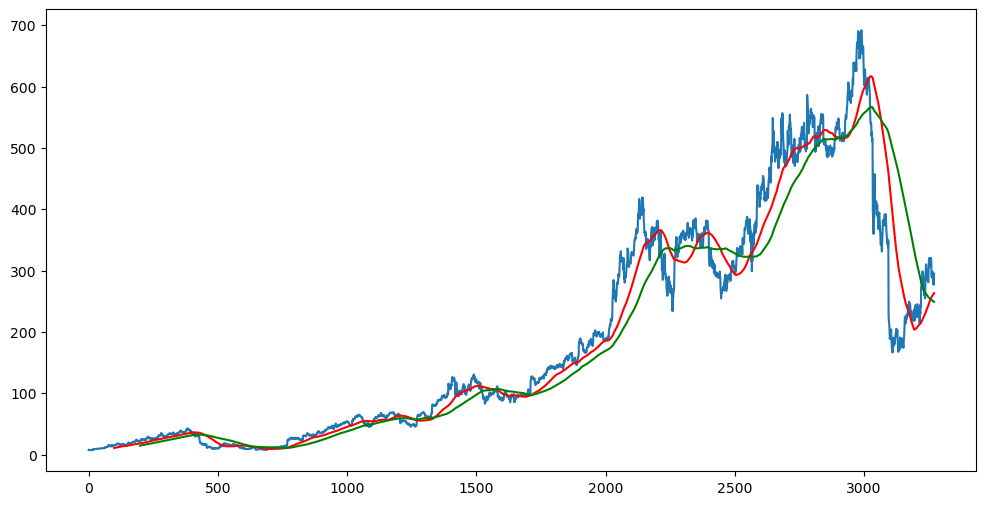

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.plot()

In [16]:
df.shape

(3272, 5)

Splitting Data into Training and Testing 

In [17]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2290, 1)
(982, 1)


In [18]:
data_train.head()

,Close
0,7.640000
1,7.358571
2,7.617143
3,7.485714
4,7.614286


In [19]:
data_test.tail()

,Close
3267,294.959991
3268,284.170013
3269,276.880005
3270,291.119995
3271,294.880005


Scaling down the data using MINMAX Scaler for fitting into LSTM Model

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[1.50850057e-03],
       [8.25340386e-04],
       [1.45301657e-03],
       ...,
       [8.46680946e-01],
       [8.37893514e-01],
       [8.19736007e-01]])

In [22]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(2190, 100, 1)

In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [29]:
#Layer 1
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Layer 2
model = Sequential()
model.add(LSTM(units = 60, activation='relu', return_sequences= True))

model.add(Dropout(0.3))

#Layer 3
model = Sequential()
model.add(LSTM(units = 80, activation='relu', return_sequences= True))

model.add(Dropout(0.4))


#L4
model = Sequential()
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

#CONNECT
model.add(Dense(units = 1))

In [35]:
# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 5s 50ms/step - loss: 0.0109
Epoch 2/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0038
Epoch 3/50
69/69 [==============================] - 4s 52ms/step - loss: 0.0034
Epoch 4/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0024
Epoch 5/50
69/69 [==============================] - 3s 48ms/step - loss: 0.0026
Epoch 6/50
69/69 [==============================] - 3s 49ms/step - loss: 0.0026
Epoch 7/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0026
Epoch 8/50
69/69 [==============================] - 3s 46ms/step - loss: 0.0022
Epoch 9/50
69/69 [==============================] - 3s 46ms/step - loss: 0.0022
Epoch 10/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0022
Epoch 11/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0023
Epoch 12/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0022
Epoch 13/50
69/69 [==================

In [36]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 120)               58560     
                                                                 
 dropout_7 (Dropout)         (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.save('keras_model.h5')

In [96]:
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [97]:
final_df.head()

,Close
0,364.559998
1,350.350006
2,367.649994
3,366.959991
4,365.359985


In [98]:
input_data = scaler.fit_transform(final_df)

In [99]:
input_data

array([[0.3772748 ],
       [0.35022464],
       [0.38315693],
       ...,
       [0.21036703],
       [0.2374743 ],
       [0.24463186]])

In [100]:
input_data.shape

(1082, 1)

In [101]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i:0])

In [102]:
x_test,  y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(982, 100, 1)
(982, 0, 1)


In [103]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 1s 18ms/step


In [104]:
y_predicted.shape

(982, 1)

In [105]:
scaler.scale_

array([0.0019036])

In [106]:
scale_factor = 1/0.0019036
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor